In [39]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import ptitprince as pt 


In [41]:
#import LCA results
a = pd.DataFrame(pd.read_excel('scores_a.xlsx',index_col=0))
b = pd.DataFrame(pd.read_excel('scores_b.xlsx',index_col=0))

In [4]:
data = [
    ['Global warming potential', 'GWP-100', 'kg CO2-eq.']]

impact_dict = {}
for impact in data:
    impact_dict[impact[0]] = {'indicator': impact[1], 'unit': impact[2]}

In [11]:
a

,0
0,139163.755983
1,167709.687061
2,160043.090020
3,153957.898561
4,162022.833165
...,...
11995,154155.483616
11996,149512.873673
11997,162444.124232
11998,153385.954863


In [16]:
impact_dict

{'Global warming potential': {'indicator': 'GWP-100', 'unit': 'kg CO2-eq.'}}

In [42]:

baseline = b
alternative = a
text = 'DZOAB'

imp_dzoab = pd.DataFrame(baseline[0])
imp_dzoab30 = pd.DataFrame(alternative[0])
imp_dzoab['RAP content'] = '0%'
imp_dzoab30['RAP content'] = '30%'
imp = pd.concat([imp_dzoab,imp_dzoab30],axis=0)
imp.rename(columns={0: 'kg CO2-eq.'}, inplace=True)
#imp[i] = imp[i]*1050
#imp.rename(columns={[0]:'GWP-100'})
imp

,kg CO2-eq.,RAP content
0,205584.156252,0%
1,189386.303557,0%
2,252243.663818,0%
3,270852.416748,0%
4,211388.162707,0%
...,...,...
11995,154155.483616,30%
11996,149512.873673,30%
11997,162444.124232,30%
11998,153385.954863,30%


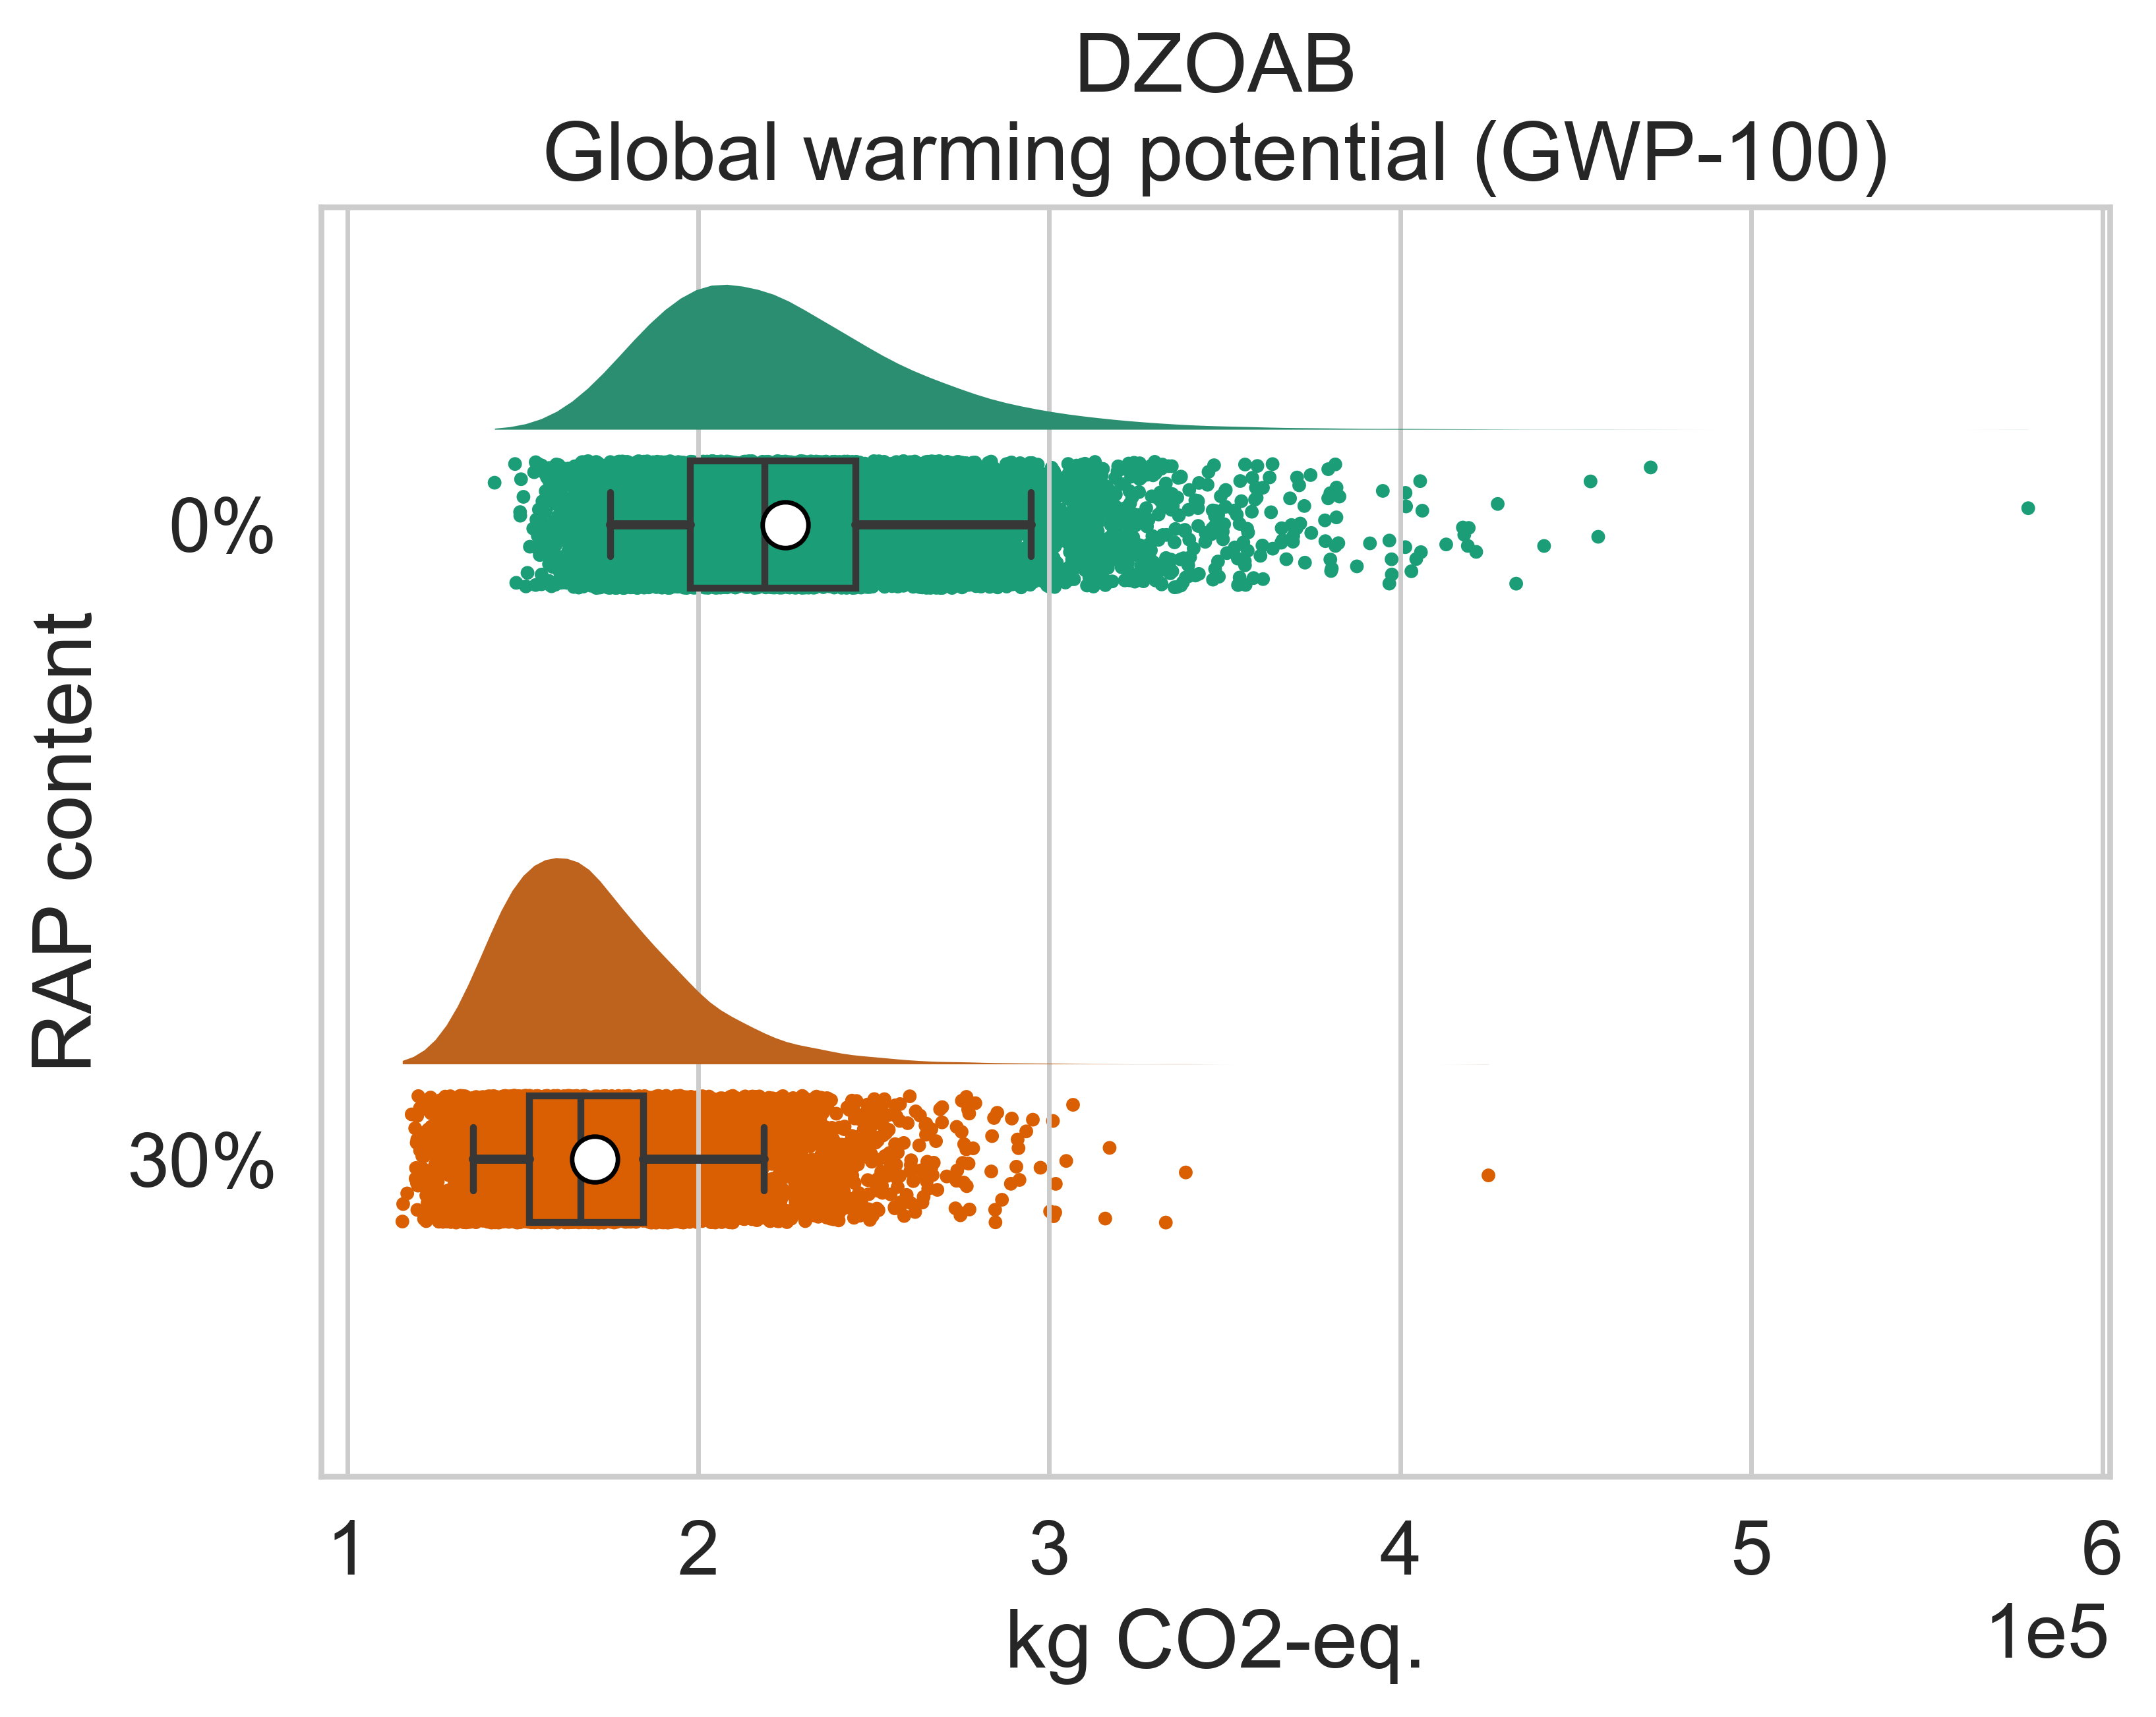

In [48]:
sns.set(style="whitegrid",font_scale=1.5)
f, ax = plt.subplots(figsize=(7, 5), dpi=500)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
pal = 'Dark2'
dy="RAP content"; dx='kg CO2-eq.'; ort="h"
ax=pt.half_violinplot( x = dx, y = dy, data = imp, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .65, inner = None, orient = ort, linewidth = 0)
ax=sns.stripplot( x = dx, y = dy, data = imp, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = imp, width = .2, zorder = 10,\
showcaps = True, boxprops = { "zorder":10}, palette = pal,\
showfliers = False, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort, whis = [5,95], showmeans = True,\
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.title(f'{text}\nGlobal warming potential (GWP-100)')
plt.savefig('graph.png',bbox_inches='tight')